# Calcolo di un integrale con metodo Montecarlo #
Il primo obiettivo è il calcolo dell'integrale definito di una funzione. In particolare, si vuole confrontare, a parità di lanci del generatore di numeri casuali, la precisione raggiunta usando un semplice metodo di media Montecarlo rispetto al metodo dell'<i>importance sampling</i>. L'integrale che si vuole calcolare è:
\begin{equation}
I=\int_0^1 \frac{\pi}{2}\cos\left( \pi \frac{x}{2} \right) dx=1
\end{equation}

Il risultato che si ottiene con i due metodi è:

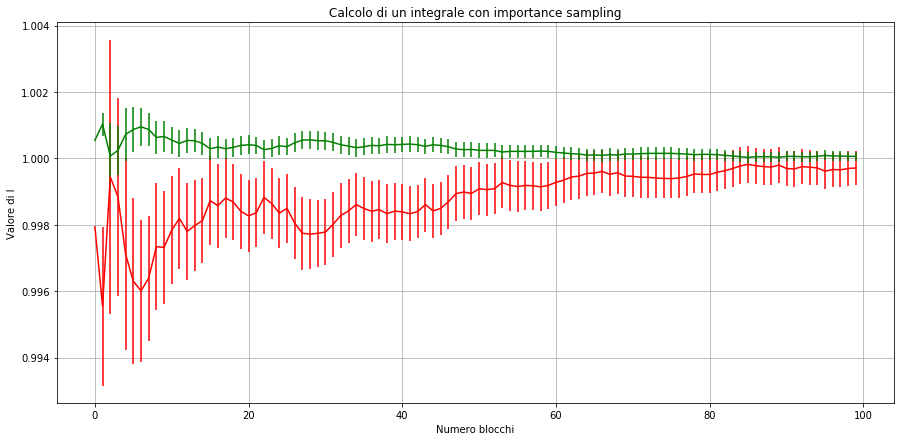

In [2]:
# Questo codice apre il file dei dati, li legge e li inserisce in un grafico apposito.
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(15,7))

x, f, error = np.loadtxt("./Esercizio02.1/integral_uniform.dat", usecols=(0,1,2), delimiter='   ', unpack='true')
plt.errorbar(x,f,yerr=error,color='r')
x2, f2, error2 = np.loadtxt("./Esercizio02.1b/integral_importance.dat", usecols=(0,1,2), delimiter='   ', unpack='true')
plt.errorbar(x2,f2,yerr=error2,color='g')
plt.xlabel('Numero blocchi')
plt.ylabel('Valore di I')
plt.grid()
plt.title("Calcolo di un integrale con importance sampling")

plt.show()

In rosso sono mostrati i dati ottenuti integrando con una media Montecarlo ordinaria. I dati in verde sono invece quelli ottenuti usando un importance sampling, che sfrutti dati più "simili" possibili alla funzione da integrare. In particolare, in questo caso ho usato dati distribuiti secondo la funzione:
$$
\rho(x) = -2x+2
$$
quindi la funzione da valutare nei punti diventa:
$$
g(x) = \frac{f(x)}{\rho(x)} = \frac{\pi}{2}\cos\left( \pi \frac{x}{2} \right) \cdot \frac{1}{-2x+2}
$$
in modo tale che si abbia:
$$
I =\int_0^1 f(x) dx= \int_0^1 g(x)\rho(x) dx
$$
Chiaramente, una singola valutazione della funzione diventa (leggermente) più complessa, perché la forma funzionale della funzione $g(x)$ è un po' più elaborata di quella della funzione $f(x)$. Però la convergenza quando si usino dati distribuiti secondo $\rho(x)$ è enormemente più rapida rispetto a quando si usano punti $x$ distribuiti uniformemente. Per ottenere una precisione analoga con $x$ distribuiti uniformemente sarebbe necessario ripetere il test ancora per un centinaio di volte i punti considerati (tenendo conto che nei metodi Montecarlo l'errore tende a scalare con $\sqrt{N}$, dove $N$ è il numero di punti.

# Random walk con distribuzioni di probabilità uniformi #
Il secondo obiettivo della lezione è l'analisi di due random walk. Dapprima si considera il random walk su un reticolo tridimensionale: ad ogni passo, il walker sceglie in maniera casuale (distribuzione uniforme) la direzione in cui muoversi (alto-basso, destra-sinistra, avanti-dietro) e poi lancia una moneta per scegliere se aumentare o diminuire di un passo reticolare la coordinata estratta. In particolare, considero un gran numero di walker ($10^4$) e ad ogni passo calcolo la distanza di ciascuno dall'origine delle coordinate (da cui sono partiti). Ci possiamo aspettare che il valor medio delle distanze dall'origine tenda a zero (questo è ovvio se il generatore di numeri casuali funziona correttamente, perché walker in posizioni opposte danno somma zero). A questo punto, la deviazione standard delle distanze si riduce al calcolo di:
$$ \sigma(d)= \sqrt{<d^2> - <d>^2} \to \sqrt{<d^2>} $$ 
Questo è il parametro che vado effettivamente a calcolare ad ogni passo. Di fatto, esso rappresenta lo sparpagliamento dei walker al variare del numero dei passi, cioè il raggio della sfera centrata nell'origine in cui si trova la gran parte dei walker.
Infine, è noto che la relazione di proporzionalità che lo sparpagliamento dovrebbe seguire in funzione del numero di passi $N$ è:
$$ \sigma(N)=K\cdot \sqrt{N}$$
Eseguo quindi un fit per ottenere il valore di $K$.

Valore ottimale di K =
[0.99618997]
Incertezza sul valore ottimale di K =
[0.00015698]


<Figure size 1080x504 with 0 Axes>

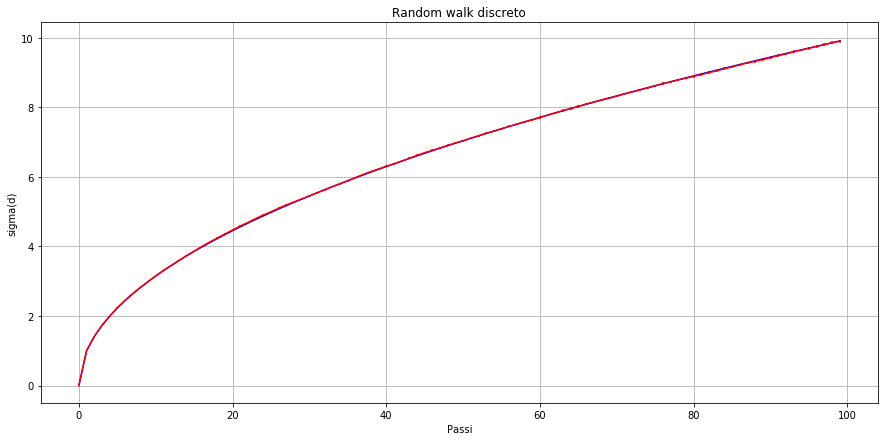

In [27]:
# Questo codice apre il file dei dati, li legge e li inserisce in un grafico apposito. Inoltre, eseguo un fit.
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

fig = plt.figure(figsize=(15,7))

def f(x,k):  # defining the fitting function
    return k * np.sqrt(x)

x, g, error = np.loadtxt("./Esercizio02.2/distances.dat", usecols=(0,1,2), delimiter='   ', unpack='true')
plt.errorbar(x,g,yerr=error,color='r')
plt.xlabel('Passi')
plt.ylabel('sigma(d)')
plt.grid()
plt.title("Random walk discreto")

p_opt, p_cov = curve_fit(f, x, g, bounds=([0],[10]))
y_fit = f(x,p_opt[0])
plt.plot(x,y_fit,color='b') # plotting fitted function
print("Valore ottimale di K =")
print(p_opt)
print("Incertezza sul valore ottimale di K =")
print(np.sqrt(np.diagonal(p_cov)))

plt.show()

Osservo che è stato fatto il calcolo delle incertezze, ma esse sono piccolissime e quindi pressoché invisibili nel grafico. Sono comunque riportate nel file.

Ho poi eseguito la stessa misura su un random walk non più discreto ma continuo: ad ogni passo vengono estratti due angoli $\theta$ e $\phi$ e poi ci si muove di una unità nella direzione indicata. Il risultato ottenuto è praticamente identico.

Valore ottimale di K =
[1.00263554]
Incertezza sul valore ottimale di K =
[0.00026396]


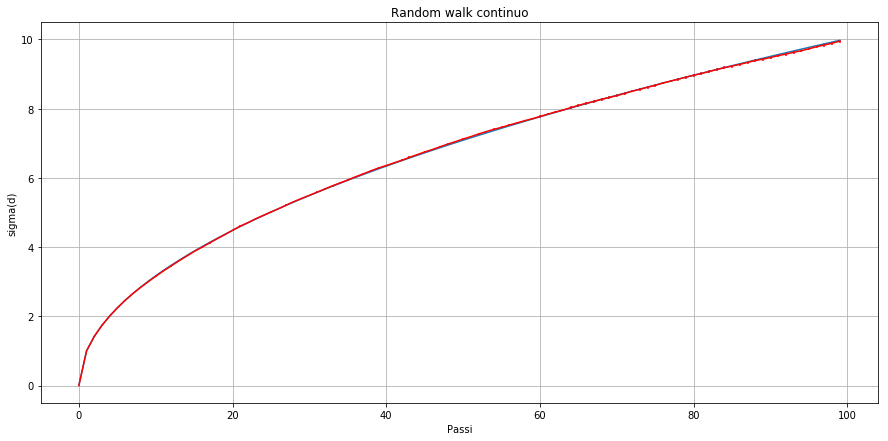

In [30]:
# Questo codice apre il file dei dati, li legge e li inserisce in un grafico apposito. Inoltre, eseguo un fit.
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

fig = plt.figure(figsize=(15,7))

def f(x,k):  # defining the fitting function
    return k * np.sqrt(x)

x, g, error = np.loadtxt("./Esercizio02.2b/distances.dat", usecols=(0,1,2), delimiter='   ', unpack='true')
plt.errorbar(x,g,yerr=error,color='r')
plt.xlabel('Passi')
plt.ylabel('sigma(d)')
plt.grid()
plt.title("Random walk continuo")

p_opt, p_cov = curve_fit(f, x, g, bounds=([0],[10]))
y_fit = f(x,p_opt[0])
plt.plot(x,y_fit) # plotting fitted function
print("Valore ottimale di K =")
print(p_opt)
print("Incertezza sul valore ottimale di K =")
print(np.sqrt(np.diagonal(p_cov)))

plt.show()

Infine, ho tentato di disegnare in tre dimensioni la situazione dei walker dopo 100 passi (cioè alla fine del loro cammino). Si vede una sfera che sembra circa uniforme e centrata nell'origine. Compare un pattern regolare visibile perché i walker sono sul discreto, non sul continuo.

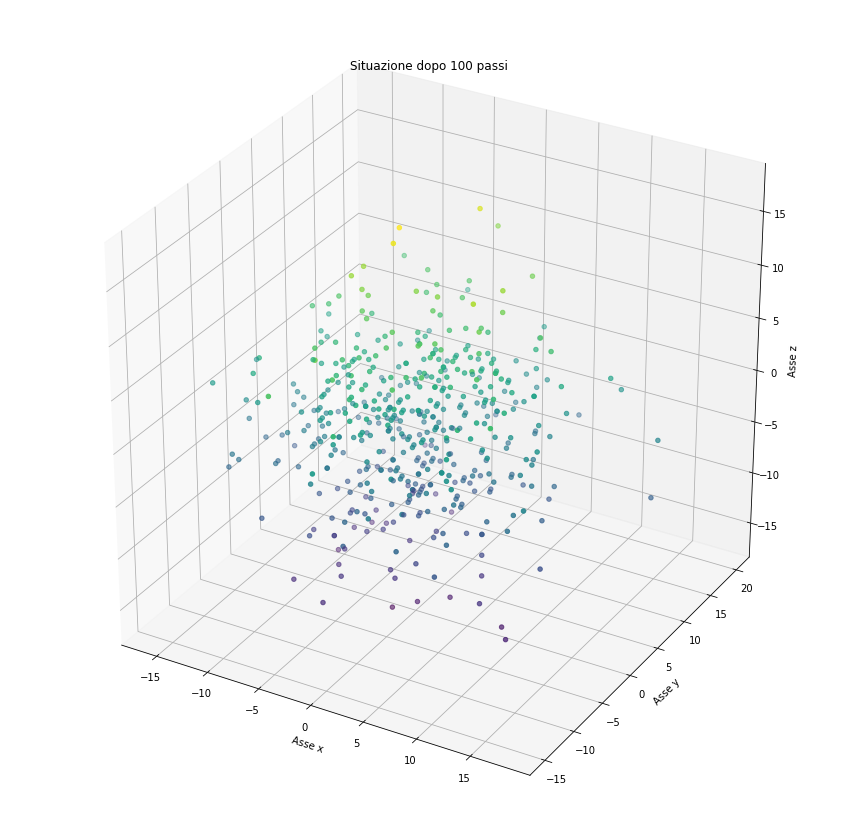

In [32]:
# Metodo per creare uno scatterplot in 3d da https://matplotlib.org/2.1.1/gallery/mplot3d/scatter3d.html
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(111, projection='3d')

xs,ys,zs = np.loadtxt("./Esercizio02.2c/positions.dat", usecols=(0,1,2), delimiter='   ', unpack='true')
ax.scatter(xs, ys, zs, c=zs)

ax.set_xlabel('Asse x')
ax.set_ylabel('Asse y')
ax.set_zlabel('Asse z')


plt.title("Situazione dopo 100 passi")
plt.show()
